In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Projeto Machine Learning 1 -- RUANN

## Conjunto de dados de detecção de fraude em transações de cartão de crédito

### Sobre o conjunto de dados
Este é um conjunto de dados simulados de transações de cartão de crédito contendo transações legítimas e fraudulentas entre 1º de janeiro de 2019 e 31 de dezembro de 2020. Abrange cartões de crédito de 1.000 clientes que fazem transações com um grupo de 800 comerciantes.

In [ ]:
# Importando bibliotecas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve,auc
from sklearn import metrics
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Projeto ML1 - Fraude/fraudTrain.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Projeto ML1 - Fraude/fraudTest.csv")

In [ ]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()
df_train1.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_test1.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Análise Exploratória

Antes mesmo de construir features e tratar as colunas, será feita uma EDA para concluir quais features podem contribuir com o modelo.

In [ ]:
# Fazendo uma cópia do dataset especificamente para a Análise Exploratória
df_analise = df_train1.copy()

In [ ]:
# Trabalhando a análise exploratória focada principalmente nos dados fraudados
df_fraudado = df_analise[df_analise["is_fraud"] == 1]
df_fraudado.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [ ]:
df_fraudado["gender"].value_counts(normalize=True)

M    0.502398
F    0.497602
Name: gender, dtype: float64

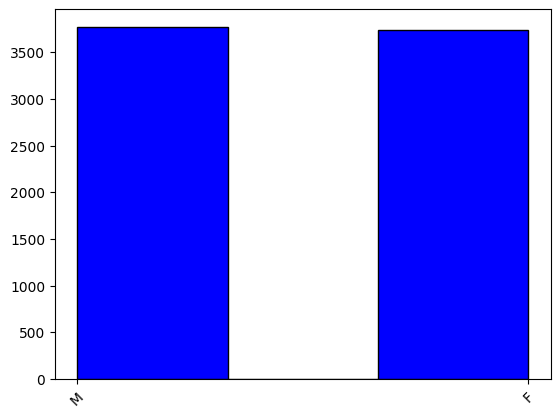

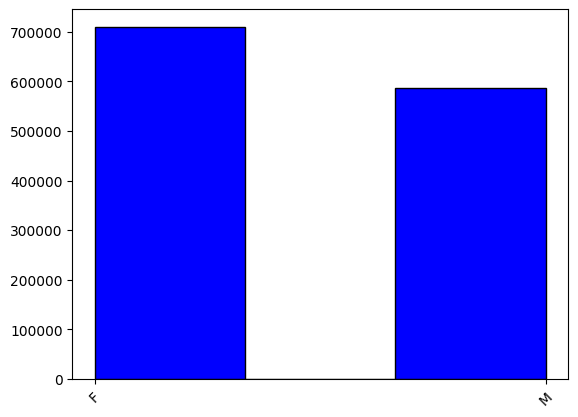

In [ ]:
plt.hist(df_fraudado["gender"], color="blue", edgecolor="black", bins=3)
plt.xticks(rotation=45)
plt.show()
plt.hist(df_analise["gender"], color="blue", edgecolor="black", bins=3)
plt.xticks(rotation=45)
plt.show()

Verifica-se que a proporção entre gêneros que cometem fraude é muito parecida, o que torna esse fator provavelmente não predominante. Porém, observa-se que no dataset geral existe uma quantia relevantemente maior de mulheres, o que pode indicar que, proporcionalmente, os homens cometem mais fraudes.

In [ ]:
df_fraudado["amt"].mean()

531.3200919264589

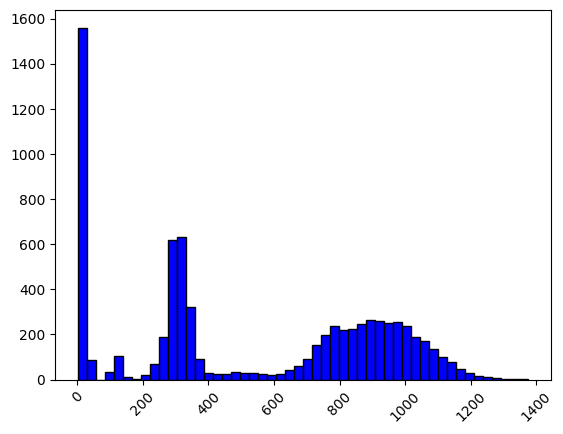

In [ ]:
plt.hist(df_fraudado["amt"], color="blue", edgecolor="black", bins=50)
plt.xticks(rotation=45)
plt.show()

A média das compras fraudadas é 531 dólares, o que indica que, provavelmente, um valor mais alto de compra está relacionado com a possibilidade da compra ser fraudada. Além disso, a grande quantidade observada no começo do gráfico pode indicar diversas fraudes menores como uma tentativa de não levantar suspeitas sobre a fraude.

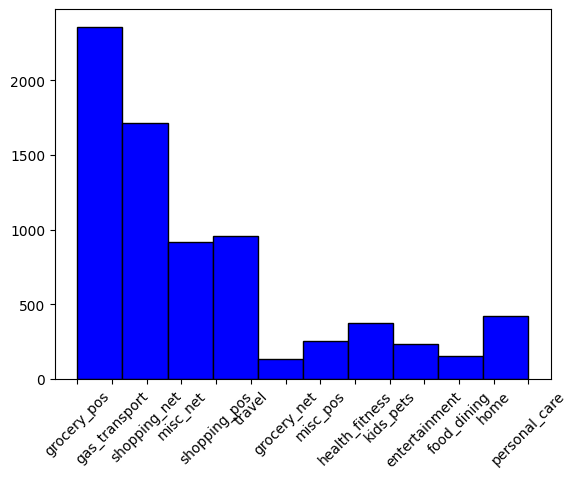

In [ ]:
plt.hist(df_fraudado["category"], color="blue", edgecolor="black")
plt.xticks(rotation=45)
plt.show()

A porcentagem de compras fraudadas está muito concentrada nas categorias: grocery_pos, shopping_net, misc_net e shopping_pos, o que indica que essa feature categórica pode ter uma grande importância para o modelo.

In [ ]:
df_fraudado["state"].value_counts(normalize=True)

NY    0.073941
TX    0.063816
PA    0.061018
CA    0.043432
OH    0.042766
FL    0.037437
IL    0.033040
MI    0.031708
AL    0.028644
MN    0.027578
VA    0.026379
SC    0.025713
MO    0.025446
NE    0.023981
WI    0.021716
AR    0.021450
MD    0.020917
KS    0.020783
KY    0.020650
OR    0.019851
NC    0.019851
GA    0.019451
WV    0.019451
OK    0.019051
IA    0.018918
IN    0.018918
TN    0.018652
ME    0.015854
NJ    0.015721
MS    0.015321
CO    0.015055
WY    0.014655
WA    0.012790
LA    0.012124
NM    0.010925
SD    0.009859
VT    0.009592
MA    0.009193
UT    0.008127
NH    0.007860
ND    0.007594
NV    0.006262
AZ    0.004929
AK    0.004796
MT    0.004263
DC    0.002798
CT    0.002132
RI    0.001998
ID    0.001465
DE    0.001199
HI    0.000933
Name: state, dtype: float64

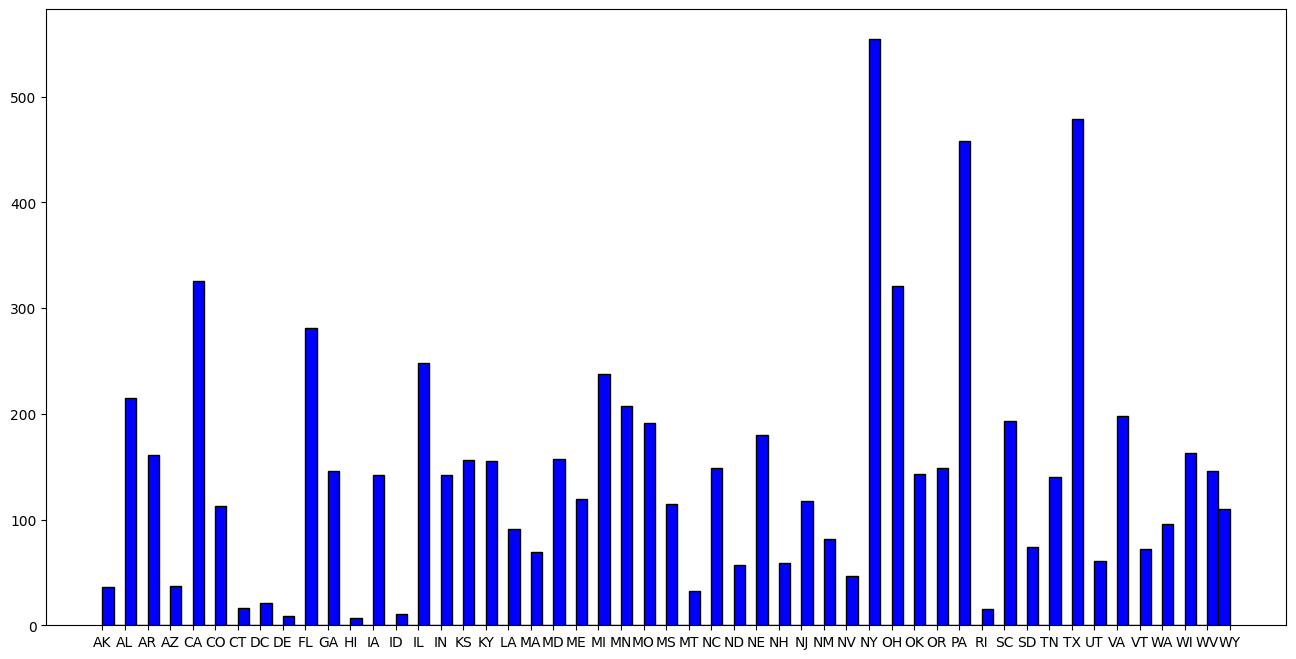

In [ ]:
plt.figure(figsize=(16, 8))
plt.hist(sorted(df_fraudado["state"]), color="blue", edgecolor="black", bins=100)
plt.show()

O número de fraudes por cidade parece estar diretamente relacionado com a população da mesma, então essa feature é muito abstrata e não relevante para o escopo do modelo

Além dessas features ponderadas, concluímos que algumas colunas categóricas não são tão relevantes para o modelo. Além disso, intuitivamente construiremos novas features: Idade do comprador, distância do comprador da loja

### Analisando Balanceamento dos dados

In [ ]:
df_train1['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

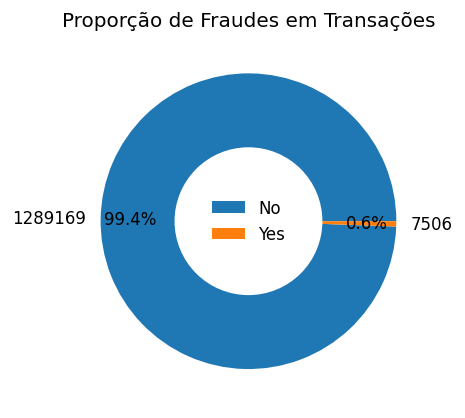

In [ ]:
donut = df_train1["is_fraud"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["is_fraud"],
        labels=donut["is_fraud"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proporção de Fraudes em Transações")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [ ]:
df_test1['is_fraud'].value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

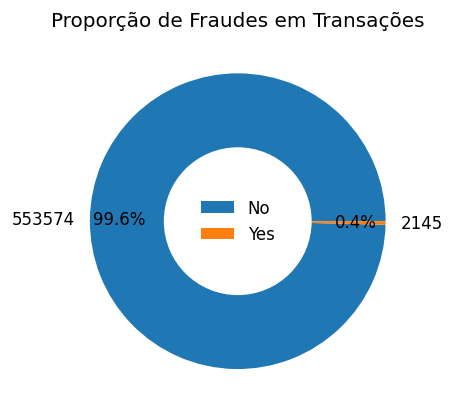

In [ ]:
donut = df_test1["is_fraud"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["is_fraud"],
        labels=donut["is_fraud"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proporção de Fraudes em Transações")
plt.legend(labels, loc="center", frameon=False)
plt.show();

Podemos perceber que é mantida a proporção de classes tanto pra treino, como para teste. Contudo, podemos ver que há um grande desbalanceamento que será tratado nos próximos passos.

## Tratamento dos Dados

In [ ]:
df_train1.info(), df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [ ]:
df_train1.describe(), df_test1.describe()

(         Unnamed: 0        cc_num           amt           zip           lat  \
 count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
 mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
 std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
 min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
 25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
 50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
 75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
 max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   
 
                long      city_pop     unix_time     merch_lat    merch_long  \
 count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
 mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
 std    1.375908e+01  3.019564e+05  1.

In [ ]:
df_test1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df_train1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Não há valores nulos na base de dados.

### Excluindo Colunas

In [ ]:
# Remover colunas de features de entrada que são categóricas com muitas categorias, sendo difícil aplicar uma transformação
excluir_colunas = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
df_train1.drop(columns=excluir_colunas,inplace=True)
df_test1.drop(columns=excluir_colunas,inplace=True)

## Pré Processamento dos Dados
- **Transformando coluna de data em datetime para conseguir uma nova informação que são as idades dos indivíduos**
- **Transformação e Construção de Novas Features a partir das Categóricas**
- **Tratando Desbalanceamento dos Dados com Reajuste de Proporção**
- **Fazendo o Split de Treino e Teste**
- **Função para Generalizar Métricas de Resultados**
- **Fazendo a Normalização dos Dados**


#### Transformando coluna de data em datetime para conseguir uma nova informação que são as idades dos compradores.


In [ ]:
df_train1['trans_date_trans_time']=pd.to_datetime(df_train1['trans_date_trans_time'])
df_train1['trans_date']=df_train1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train1['trans_date']=pd.to_datetime(df_train1['trans_date'])
df_train1['dob']=pd.to_datetime(df_train1['dob'])

df_test1['trans_date_trans_time']=pd.to_datetime(df_test1['trans_date_trans_time'])
df_test1['trans_date']=df_test1['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test1['trans_date']=pd.to_datetime(df_test1['trans_date'])
df_test1['dob']=pd.to_datetime(df_test1['dob'])

#### Transformação e Construção de Novas Features

In [ ]:
#Calculando idades
df_train1["age"] = df_train1["trans_date"]-df_train1["dob"]
df_train1["age"]=df_train1["age"].astype('timedelta64[Y]')

df_test1["age"] = df_test1["trans_date"]-df_test1["dob"]
df_test1["age"]=df_test1["age"].astype('timedelta64[Y]')

In [ ]:
# Construir uma feature que é a distância entre o comerciante e o local de residência
df_train1['latitudinal_distance'] = abs(round(df_train1['merch_lat']-df_train1['lat'],3))
df_train1['longitudinal_distance'] = abs(round(df_train1['merch_long']-df_train1['long'],3))

df_test1['latitudinal_distance'] = abs(round(df_test1['merch_lat']-df_test1['lat'],3))
df_test1['longitudinal_distance'] = abs(round(df_test1['merch_long']-df_test1['long'],3))


In [ ]:
# Excluindo outras features categóricas que não serão utilizadas para a construção da modelagem
# Um dos motivos é que essas features possuem muitas categorias, dificultando a transformação desses dados
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
df_train1.drop(columns=drop_columns,inplace=True)
df_test1.drop(columns=drop_columns,inplace=True)

In [ ]:
df_train1['gender'].value_counts(),df_test1['gender'].value_counts()

(F    709863
 M    586812
 Name: gender, dtype: int64,
 F    304886
 M    250833
 Name: gender, dtype: int64)

In [ ]:
# Convertendo a feature categórica de gênero 'F' e 'M' em 1 para 'M' e 0 para 'F'
df_train1.gender=df_train1.gender.apply(lambda x: 1 if x=="M" else 0)
df_test1.gender=df_test1.gender.apply(lambda x: 1 if x=="M" else 0)

In [ ]:
# Utilizando o One Hoting Encoding para construir features de entradas tendo como base as categorias
df_train1 = pd.get_dummies(df_train1, columns=['category'], prefix='category')
df_test1 = pd.get_dummies(df_test1, columns=['category'], prefix='category')

df_test1 = df_test1.reindex(columns=df_train1.columns, fill_value=0)

In [ ]:
df_train1.head()

,amt,gender,city_pop,is_fraud,age,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,0.068,0.870,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,0.271,0.024,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,0.970,0.108,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,0.804,0.447,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,0.254,0.830,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_test1.head()

,amt,gender,city_pop,is_fraud,age,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0.020,0.265,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0.870,0.476,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,0.177,0.660,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,0.243,0.064,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,0.706,0.868,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Tratando Desbalanceamento dos Dados com Reajuste de Proporção

Como vimos acima, este problema tem uma classe alvo muito desequilibrada. Temos apenas 0,6% de ocorrência de eventos. Isso significa que se fizermos uma estimativa cega, dizendo que cada transação não é fraude, ainda obteremos uma precisão de 99,4%!

Isso acontece porque ainda acertaremos todas as transações que não são fraudes, o que representa 99,4% do conjunto de dados.

Esse grande desbalanceamento pode causar grande enviesamento no modelo.

Então para solucionar, foi aplicado o RandomUnderSample.

O Random Under-Sampling é uma técnica de balanceamento de classes em problemas de classificação desbalanceada. Ela trata do problema de classes desproporcionalmente representadas, onde uma classe tem muito mais instâncias do que a outra. O Random Under-Sampling aborda isso reduzindo aleatoriamente o número de instâncias da classe majoritária para igualar o número de instâncias da classe minoritária.


In [ ]:
X = df_train1.drop(columns=["is_fraud"])
y = df_train1["is_fraud"]

In [ ]:
# Peguei uma proporção de quase 90%/10%, trazendo assim mais generalização ao modelo
realocando = RandomUnderSampler(sampling_strategy=0.1, random_state=23)

In [ ]:
X_undersampled, y_undersampled = realocando.fit_resample(X, y)

In [ ]:
y_undersampled.value_counts()

0    75060
1     7506
Name: is_fraud, dtype: int64

Abaixo apresento como ficou a proporção de balanceamento do modelo

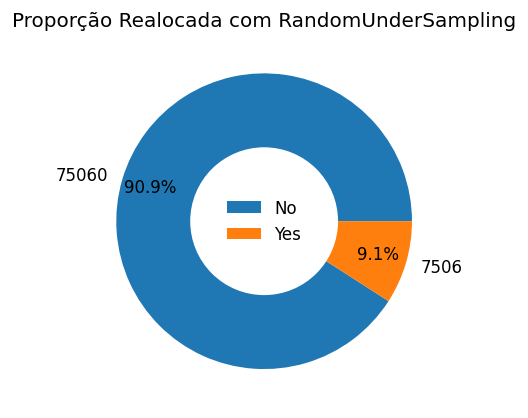

In [ ]:
donut = y_undersampled.value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["is_fraud"],
        labels=donut["is_fraud"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proporção Realocada com RandomUnderSampling")
plt.legend(labels, loc="center", frameon=False)
plt.show();

#### Fazendo o split de treinamento e teste dos dados

In [ ]:
X_train = X_undersampled
y_train = y_undersampled
X_test = df_test1.drop('is_fraud', axis=1)
y_test = df_test1['is_fraud']

In [ ]:
y_train.value_counts()

0    75060
1     7506
Name: is_fraud, dtype: int64

#### Função para Generalizar Métricas de Resultados
- Acurácia
- Precisão
- Sensibilidade
- F1-Score
- ROC-AUC

In [ ]:
def evaluate_model(target, predicted, y_score, normalize_matrix= None):
    accuracy = metrics.accuracy_score(target, predicted)
    precision = metrics.precision_score(target, predicted)
    recall = metrics.recall_score(target, predicted)
    f1 = f1_score(target, predicted)
    auc = metrics.roc_auc_score(target, y_score)

    print("Accuracy", accuracy.round(2))
    print("Precision:", precision.round(2))
    print("Recall:", recall.round(2))
    print("F1 Score", f1.round(2))
    print("AUC:", round(auc,4))

    confusion_matrix = metrics.confusion_matrix(
        target, predicted, normalize=normalize_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    fpr, tpr, threshold = roc_curve(target, y_score)
    plt.plot(fpr, tpr, label="Model", c="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", c="yellow")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    return None

#### Fazendo a normalização dos dados

A normalização dos dados é uma etapa crucial no pré-processamento de dados em muitos algoritmos de machine learning. Aqui estão algumas razões pelas quais a normalização é importante:

- Escalas Diferentes:

Diferentes características (atributos) podem ter escalas diferentes. Por exemplo, em um conjunto de dados em que uma característica representa a altura em centímetros e outra representa a renda em milhares de dólares, as escalas são muito diferentes. Algoritmos de machine learning, como aqueles baseados em distância (k-NN, SVM) ou que usam gradientes (regressão logística, redes neurais), podem ser influenciados pela escala dos dados.

Convergência Mais Rápida:

Algoritmos que envolvem otimização, como gradient descent, geralmente convergem mais rapidamente em dados normalizados. Isso é especialmente importante em modelos iterativos, onde a normalização pode acelerar o treinamento.

In [ ]:
# Já fazendo o fit e transformação da normalização nos dados de treino
scaler = StandardScaler()
# Fazendo o fit na parte de treinamento
scaler.fit(X_train)

# Transformando os dados de teste
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [ ]:
X_test

array([[-0.46981991,  1.08986986,  0.79768116, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.35094974, -0.91754074, -0.29427818, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.30054668, -0.91754074, -0.1822163 , ..., -0.30903839,
        -0.31930012, -0.17421012],
       ...,
       [-0.09963937, -0.91754074, -0.28319456, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.44721783,  1.08986986, -0.29484514, ..., -0.30903839,
        -0.31930012,  5.74019473],
       [-0.31442515,  1.08986986,  0.08489499, ..., -0.30903839,
        -0.31930012, -0.17421012]])

In [ ]:
X_train

array([[-0.27168828,  1.08986986, -0.20108336, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.02782382,  1.08986986, -0.29436011, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.43867046, -0.91754074, -0.29278048, ..., -0.30903839,
        -0.31930012,  5.74019473],
       ...,
       [-0.43730464,  1.08986986, -0.06148613, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.38685752, -0.91754074, -0.29519253, ..., -0.30903839,
        -0.31930012, -0.17421012],
       [-0.43748088,  1.08986986, -0.06148613, ..., -0.30903839,
        -0.31930012, -0.17421012]])

## Construção dos Modelos

## Gradient Boosting Baseline

O Gradient Boosting Classifier é um algoritmo de aprendizado de máquina que pertence à família de métodos de boosting. Essa abordagem constrói um modelo de previsão forte a partir de um conjunto de modelos de previsão fracos, geralmente árvores de decisão rasas. O processo de treinamento é iterativo, onde modelos fracos são ajustados para corrigir os erros dos modelos anteriores.

Aqui estão alguns pontos chave sobre Gradient Boosting Classifier:

- Modelos Fracos (Weak Learners):

Os modelos fracos referem-se a algoritmos de aprendizado simples que têm desempenho ligeiramente melhor do que o acaso. Em geral, árvores de decisão rasas são frequentemente utilizadas como modelos fracos.

- Treinamento Iterativo:

O algoritmo treina modelos fracos de forma iterativa, enfatizando as instâncias que foram classificadas incorretamente pelos modelos anteriores.

- Resíduos e Gradientes:

No treinamento de cada modelo, o algoritmo se concentra nos resíduos ou gradientes dos modelos anteriores, ajustando os modelos subsequentes para corrigir esses erros.

- Combinação Ponderada:

Cada modelo fraco contribui para a previsão final do modelo combinando suas previsões ponderadas. A ponderação é determinada pelo desempenho do modelo fraco em relação aos erros anteriores.

- Regularização:

Gradient Boosting inclui técnicas de regularização para evitar overfitting, como a limitação da profundidade das árvores.

O Gradient Boosting Classifier é conhecido por sua capacidade de criar modelos de alta precisão e é amplamente utilizado em competições de ciência de dados e em problemas do mundo real.

- Diferenciações para outros modelos:

Os modelos de gradient boosting podem ser utilizados para tarefas tanto de regressão quanto de classificação. Em contraste com a floresta aleatória, esses modelos buscam construir árvores de maneira sequencial, visando corrigir os erros das árvores anteriores (MÜLLER; GUIDO, 2017).

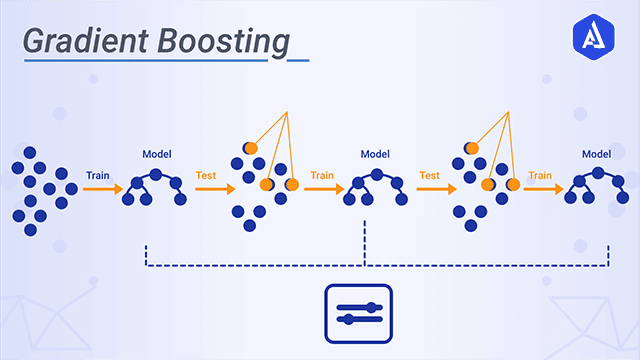

### Gradient Boosting Baseline

In [ ]:
gboost = GradientBoostingClassifier(random_state=23)

In [ ]:
gboost.fit(X_train, y_train)

y_pred_train = gboost.predict(X_train)
y_score_train = gboost.predict_proba(X_train)[:,1]

y_pred_test = gboost.predict(X_test)
y_score_test = gboost.predict_proba(X_test)[:,1]

Accuracy 0.98
Precision: 0.96
Recall: 0.85
F1 Score 0.9
AUC: 0.9899


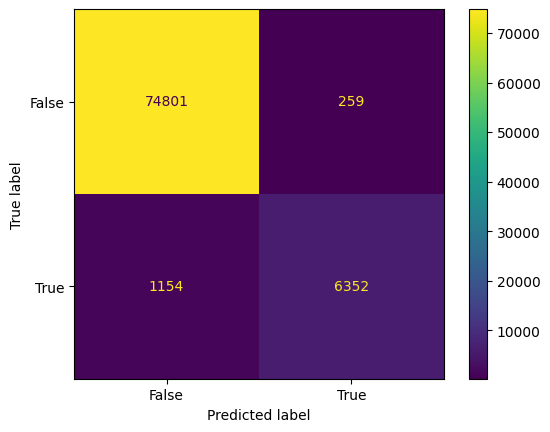

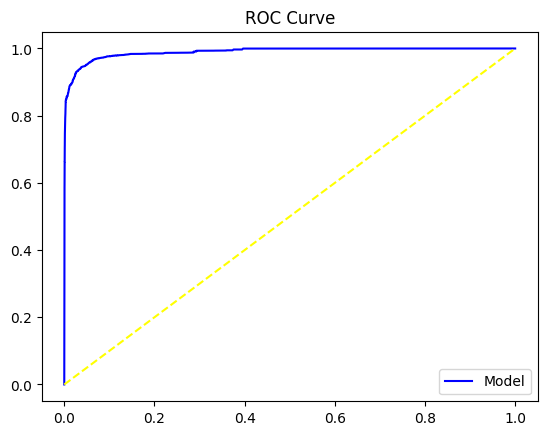

In [ ]:
# Métricas de Treino
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy 1.0
Precision: 0.46
Recall: 0.82
F1 Score 0.58
AUC: 0.9878


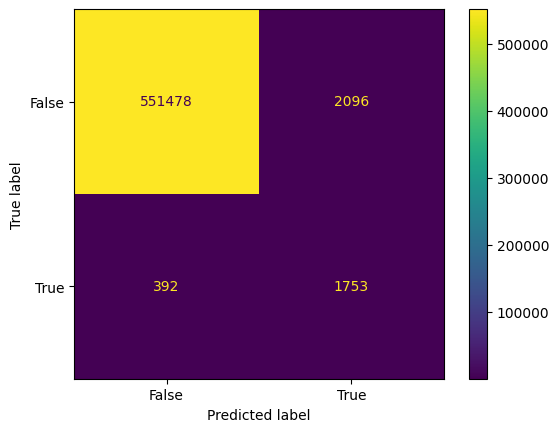

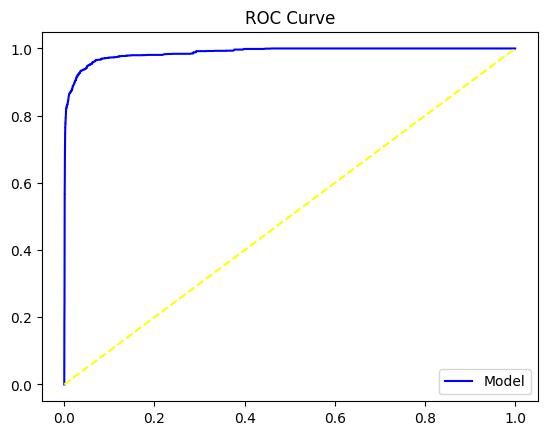

In [ ]:
# Métricas de Teste
evaluate_model(y_test, y_pred_test, y_score_test)

## Gradient Boosting Otimizado

#### Otimização com Grid Search CV
A otimização feita no modelo foi utilizando o Grid Search. A pesquisa de grade pode ser pensada como uma pesquisa exaustiva para selecionar um modelo. Na pesquisa de grade, configura-se uma grade de valores de hiperparâmetros e para cada combinação treina um modelo e pontua nos dados de teste. Nesta abordagem, todas as combinações de valores de hiperparâmetros são tentadas, o que pode ser muito ineficiente, pela questão do tempo e custo computacional. O Scikit Learn oferece a função 'GridSearchCV' para esse processo.

Ressalta-se que através da 'GridSearchCV',a mesma já faz a divisão dos dados de treino em treino e validação através do seu fit, não necessitando assim, fazer a divisão dos dados de treino previamente.

Os hiperparâmetros otimizados, foram:
   
  - Learning Rate: A taxa de aprendizagem reduz a contribuição de cada árvore em learning_rate. Existe uma compensação entre taxa de aprendizagem e n_estimadores.
  - max_depth: A profundidade máxima limita o número de nós na árvore. Ajuste este parâmetro para melhor desempenho; o melhor valor depende da interação das variáveis ​​de entrada.
  - n_estimators: O número de estágios de reforço a serem executados. O aumento de gradiente é bastante robusto ao ajuste excessivo, portanto, um número grande geralmente resulta em melhor desempenho.

### Gradient Boosting Otimizado

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
    }

#stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(gboost, param_dist, cv=5)


# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

# Extraindo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

In [ ]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
y_pred_train = grid_search.predict(X_train)
y_score_train = grid_search.predict_proba(X_train)[:,1]

y_pred_test = grid_search.predict(X_test)
y_score_test = grid_search.predict_proba(X_test)[:,1]

Accuracy 0.99
Precision: 0.97
Recall: 0.87
F1 Score 0.92
AUC: 1.0


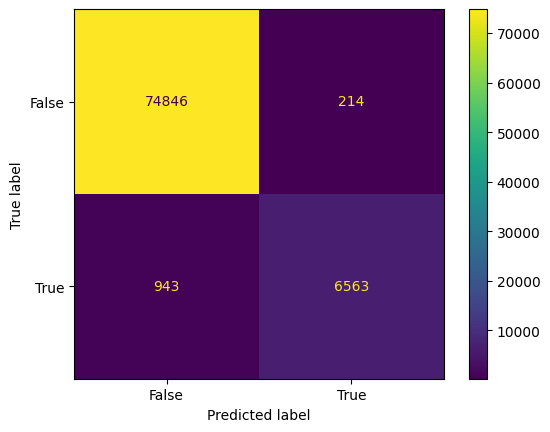

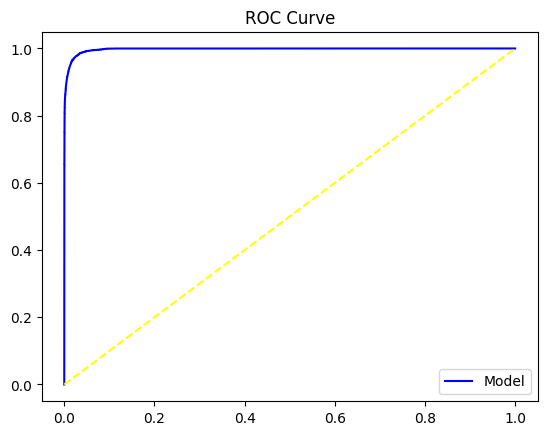

In [ ]:
# Métricas de Treino
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy 1.0
Precision: 0.45
Recall: 0.84
F1 Score 0.58
AUC: 0.9948


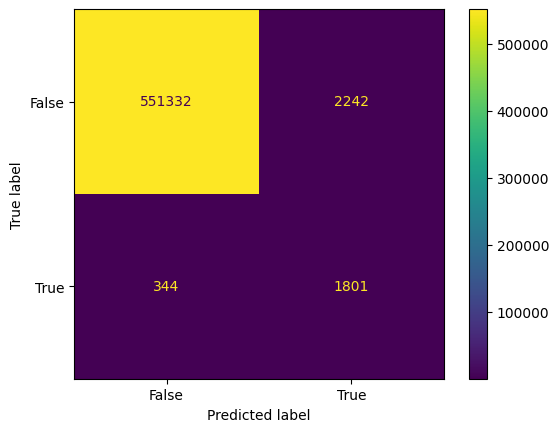

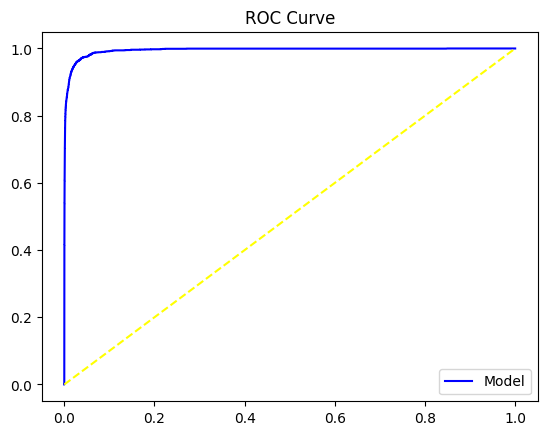

In [ ]:
# Métricas de Teste
evaluate_model(y_test, y_pred_test, y_score_test)

# Conclusão

Conclui-se que o modelo baseline sem otimização e o modelo otimizado apresentam resultados bem relevantes e parecidos (Curva de Roc-Auc, por exemplo). Sendo que podemos destacar o aumento de 2% de sensibilidade no otimizado.

Apesar de apresentar uma precisão 1% menor, quando comparamos as matrizes de confusão acima, ao fazer a predição dos valores de testes, o modelo otimizado apresenta uma maior quantidade de acerto na classe de Verdadeiros Positivos (Classe 1), classe com menos registros na base, em comparação com o baseline. Mas reforço que os modelos apresentam resultados bem parecidos.

Sendo assim, para a nossa tabela final de comparação, escolho como representante, o modelo **Gradient Boosting Otimizado**, mas baseline seria um ótimo representante também.

Abaixo segue as características e resultados do **Gradient Boosting Otimizado**:
- Dados normalizados com Standad Scaler
- Foi aplicado um balanceamento de RandomUnderSampler
- Otimizado com GridSearch e validação cruzada, sendo os hiperparâmetros otimizados:
  - {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
- Sendo seus resultados:
  - Accuracy 1.0
  - Precision: 0.45
  - Recall: 0.84
  - F1 Score 0.58
  - AUC: 0.9948

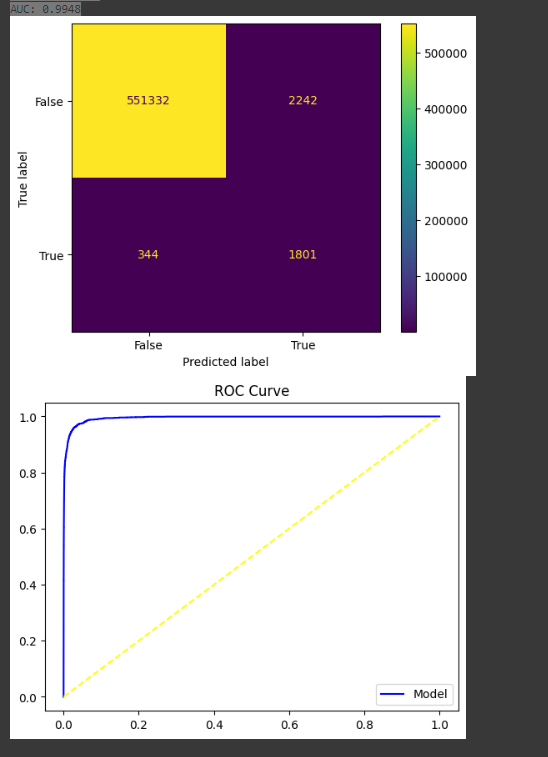

# Apêndice

## Light GBM

### LightGBM Baseline

In [ ]:
lgbm = LGBMClassifier(random_state=23)

In [ ]:
#LightGBM

lgbm.fit(X_train, y_train)

y_pred_train = lgbm.predict(X_train)
y_score_train = lgbm.predict_proba(X_train)[:,1]

y_pred_test = lgbm.predict(X_test)
y_score_test = lgbm.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 7506, number of negative: 75060
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 82566, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302585
[LightGBM] [Info] Start training from score -2.302585


Accuracy 0.99
Precision: 0.96
Recall: 0.89
F1 Score 0.93
AUC: 1.0


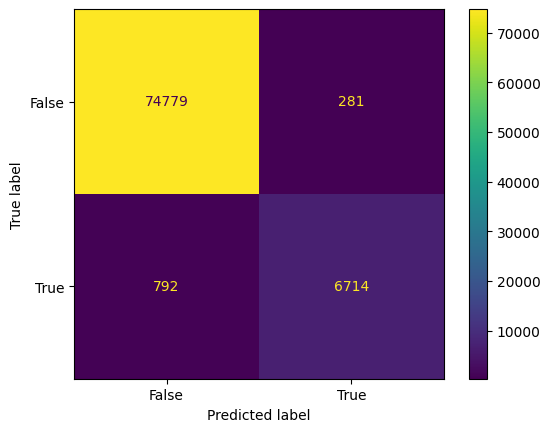

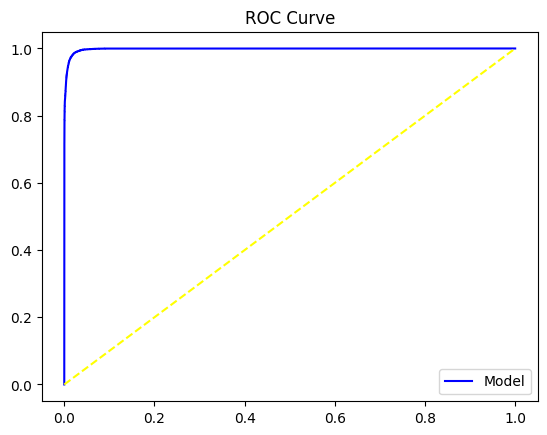

In [ ]:
# Métricas de Treinamento
evaluate_model(y_train, y_pred_train, y_score_train)

Accuracy 0.99
Precision: 0.39
Recall: 0.85
F1 Score 0.53
AUC: 1.0


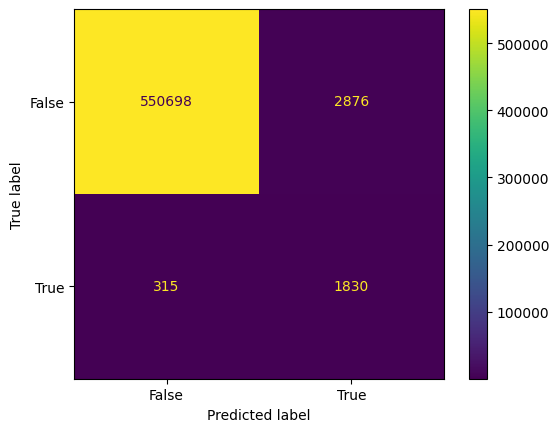

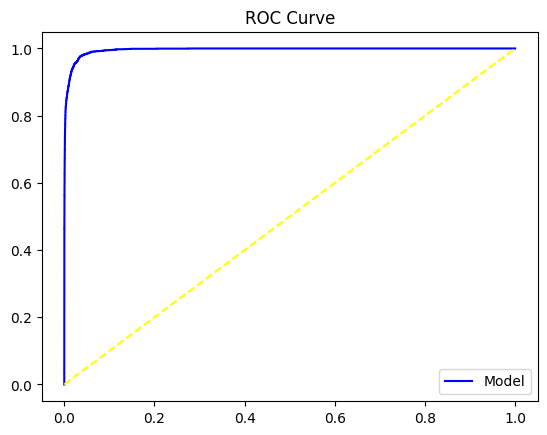

In [ ]:
# Métricas de Testes
evaluate_model(y_test, y_pred_test, y_score_test)

### Light GBM Otimizado

In [ ]:
# grid search  hyperparameter tuning

# parameters = {
#     'task' : ['predict'],
#     'boosting': ['gbdt' ],
#     'objective': ['root_mean_squared_error'],
#     'num_iterations': [  1500, 2000,5000  ],
#     'learning_rate':[  0.05, 0.005 ],
#    'num_leaves':[ 7, 15, 31  ],
#    'max_depth' :[ 10,15,25],
#    'min_data_in_leaf':[15,25 ],
#   'feature_fraction': [ 0.6, 0.8,  0.9],
#     'bagging_fraction': [  0.6, 0.8 ],
#     'bagging_freq': [   100, 200, 400  ],

# }

# gsearch_lgb = GridSearchCV(lgb_model, param_grid = parameters, n_jobs=6)
# gsearch_lgb.fit(X_train,y_train)

## Regressão Logística
A regressão logística é um modelo estatístico usado para análise de dados em que a variável de resposta é binária, ou seja, assume dois valores possíveis, geralmente 0 e 1. Seu objetivo principal é modelar a relação entre uma variável dependente binária e uma ou mais variáveis independentes, expressando essa relação em termos de probabilidade.

Aqui estão os principais pontos organizados sobre regressão logística:

- Objetivo:

A regressão logística é usada quando a variável de resposta é categórica e binária, representando, por exemplo, eventos como "sucesso" ou "fracasso", "sim" ou "não", "positivo" ou "negativo".

- Função Logística:

Utiliza a função logística, também conhecida como função sigmoid, para modelar a probabilidade de ocorrência do evento de interesse. A função logística transforma valores reais para o intervalo (0, 1).

- Coeficientes e Interpretação:

Os coeficientes da regressão logística indicam como a mudança em uma unidade nas variáveis independentes afeta o log-odds (logaritmo da razão de probabilidade). A interpretação é realizada usando a função exponencial para obter as chances (odds) reais.

- Treinamento do Modelo:

Os coeficientes do modelo são estimados por métodos como Máxima Verossimilhança Condicional. O ajuste do modelo é realizado para maximizar a probabilidade condicional dos dados observados.

#### Modelo Baseline RL

In [ ]:
# Balanceamento dos dados: Definindo pesos das classes
weights = {0: 1, 1: 400, 2: 1}  # Peso 250 vezes maior para a classe com índice 1 (classe minoritária)
model_LR_baseline = LogisticRegression(class_weight=weights)
model_LR_baseline.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
model_LR_baseline.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_LR_baseline = model_LR_baseline.predict(X_test);

In [ ]:
print(f'A acurácia do LR baseline foi: {round(accuracy_score(y_test,y_pred_LR_baseline)*100,2)}%')
acuracia_baseline_LR = round(accuracy_score(y_test,y_pred_LR_baseline)*100,2)

A acurácia do LR baseline foi: 48.72%


In [ ]:
print(classification_report(y_test,y_pred_LR_baseline))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65    553574
           1       0.01      0.69      0.01      2145

    accuracy                           0.49    555719
   macro avg       0.50      0.59      0.33    555719
weighted avg       0.99      0.49      0.65    555719



<Axes: >

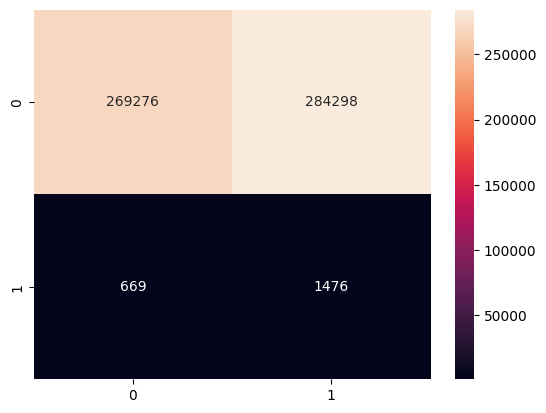

In [ ]:
cm_base_LR = metrics.confusion_matrix(y_test,y_pred_LR_baseline)
sns.heatmap(cm_base_LR, annot=True, fmt = 'd')

#### Modelo LR com Otimização de Hiperparâmetros e Validação Cruzada
##### Otimização --- GridSearch CV
A otimização feita no modelo LR foi utilizando o Grid Search. A pesquisa de grade pode ser pensada como uma pesquisa exaustiva para selecionar um modelo. Na pesquisa de grade, o cientista de dados configura uma grade de valores de hiperparâmetros e, para cada combinação, treina um modelo e pontua nos dados de teste. Nesta abordagem, todas as combinações de valores de hiperparâmetros são tentadas, o que pode ser muito ineficiente, pela questão do tempo e custo computacional. O Scikit Learn oferece a função 'GridSearchCV' para esse processo.

Ressalta-se que através da 'GridSearchCV',a mesma já faz a divisão dos dados de treino em treino e validação através do seu fit, não necessitando assim, fazer a divisão dos dados de treino previamente.

Os hiperparâmetros otimizados, foram:
   
  - C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
  - Penalty: Tecnica de regularização que será utilizada.
  - Max_iter: Número máximo de iterações tomadas para os solucionadores convergirem.
  - Tol: Tolerância para critérios de parada.

In [ ]:
weights = {0: 1, 1: 250, 2: 1}
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model_LR_otimizado = LogisticRegression()
# Definindo os parâmetros que serão utilizados no GridSearchCV
param_dist = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [50, 100],
    'tol':[0.01,0.001,0.0001]
}
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(model_LR_otimizado, param_dist, cv=stratified_cv)


# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
y_pred_LR_otimizado = grid_search.predict(X_test);

In [ ]:
print(f'A acurácia do Modelo LR otimizado foi: {round(accuracy_score(y_test,y_pred_LR_otimizado)*100,2)}%')
acuracia_otimizado_LR = round(accuracy_score(y_test,y_pred_LR_otimizado)*100,2)

In [ ]:
print(classification_report(y_test,y_pred_LR_otimizado))

In [ ]:
cm_otimizado_LR = metrics.confusion_matrix(y_test,y_pred_LR_otimizado)
sns.heatmap(cm_otimizado_LR, annot=True, fmt = 'd')

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Aplicando o SMOTE nos dados de treino
X_train, y_train = smote.fit_resample(X_train, y_train)